## Worksheet 5

### Group 22 Eaton Heidegger and Shannon Schröder

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### a) Show that dimensionless units can be introduced, by setting \( G = M = b = 1 \). What is the relation between $\hat{r}, \hat{\rho}(\hat{r})$ and $\hat{\Phi}(\hat{r})$  in these so-called ‘N-body units’ and the corresponding quantities in physical units? The mass of a star becomes $\hat{m} = \frac{m}{M} = \frac{1}{N}$.


We are given the Plummer model formulas for the mass density 

$
\rho(r) = \frac{3M}{4\pi b^3} \left(1 + \frac{r^2}{b^2}\right)^{-5/2}
$ \
and gravitational potential: \
$
\Phi(r) = -\frac{GM}{\sqrt{r^2 + b^2}}
$

To simplify the problem, we introduce **dimensionless variables** using the standard **N-body units**:

G = M = b = 1

Therefore we can rewrite the radius, density, and potential with the dimensionless variables:
$\hat{r} = \frac{r}{b}, \quad \hat{\rho}(\hat{r}) = \frac{\rho(r)}{\rho_0}, \quad \hat{\Phi}(\hat{r}) = \frac{\Phi(r)}{\Phi_0}
$


####  Density:

When using M=G=b=1, the density becomes: \
\
$
\rho(r) = \frac{3}{4\pi} \left(1 + {r}^2\right)^{-5/2}
$

and since b=1, r= $\hat{r}$, and therefore this term becomes: \
\
$
\hat{\rho}(\hat{r}) = \rho(\hat{r}) = \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2}
$



#### Gravitational Potential:
Again,  substitute $r = b\hat{r}$, with b=1, M=1, G=1 into the potential, then this term becomes:\
\
$
\Phi(r) = -\frac{1}{\sqrt{\hat{r}^2 +1 }}
$



By setting \( G = M = b = 1 \), we obtain dimensionless quantities:

- $\hat{r} = \frac{r}{b} $
- $ \hat{\rho}(\hat{r}) = \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2}$
- $\hat{\Phi}(\hat{r}) = -\frac{1}{\sqrt{1 + \hat{r}^2}}$
- $ \hat{m} = \frac{1}{N}$

Therefore, the relation between the N-body units and the quantities in physical units is:
- $  \rho(r) = \frac{M}{b^3} \hat{\rho}(\hat{r}) $
- $  \Phi(r) = \frac{GM}{b} \hat{\Phi}(\hat{r})$ 
- $r = b\hat{r}$



###  Explicit sampling approach
#### b) Show that in the dimensionless units the density is normalised and $p_r(\hat{r})$ is the probability distribution function for the dimensionless radius

For a normalised distribution, the Integral over the function from 0 to infinity has to be 1. 

To do this, we integrate the density over all space : $\int_{\mathbb{R}^3} \hat{\rho}(\vec{r}) \, d^3\vec{r} = 1$

Due to spherical symmetry, we switch to spherical coordinates:\
\
$
\int_0^\infty \hat{\rho}(\hat{r}) \cdot 4\pi \hat{r}^2 \, d\hat{r} = 1
$

Now plug in the expression for $\hat{\rho}(\hat{r})$:

$
\int_0^\infty \left[ \frac{3}{4\pi} (1 + \hat{r}^2)^{-5/2} \right] \cdot 4\pi \hat{r}^2 \, d\hat{r}
= 3 \int_0^\infty \hat{r}^2 (1 + \hat{r}^2)^{-5/2} \, d\hat{r}
$

We use the known Integral: 

$\int_0^\infty \frac{r^2}{(1 + r^2)^{5/2}} \, dr = \frac{1}{3}$\
\
, so 

$3 \int_0^\infty \hat{r}^2 (1 + \hat{r}^2)^{5/2} \, d\hat{r} = 3 \cdot \frac{1}{3} = 1
$

Therefore, the Plummer density profile is normalised and the probability density function of the dimensionless radius is: 

$\boxed{
p_r(\hat{r}) = 4\pi \hat{r}^2 \hat{\rho}(\hat{r}) = 3 \hat{r}^2 (1 + \hat{r}^2)^{-5/2}
}$

#### c) 


To generate realistic star positions from a Plummer model, we exploit its spherical symmetry and known probability density function (PDF).

We first calculate the cumulative function by integrating the PDF from 0 to $\hat{r}$ and then calculate the inverse of the cumulative Function by using an online calculator : 

$ r = \sqrt{(1-u)^{-2/3} -1}$ \
This gives us a method to sample radii using the inversion method by using the random sampling method for u ~ Uniform(0,1) (`np.random.uniform`). The `np.random.uniform(0,1,N)` generates random values $u_i$, for a given i = 1,..., N and gives us therefore i positions for r.
The inversion method is ideal here because it's:
- Exact (no numerical approximation),

- Efficient (no rejection sampling needed),

- Uses just one uniform random number.

- The loop over i = 1,..., N is done implicitly using NumPy arrays and vectorized operations, instead of a for loop

To place the stars in 3D, we must choose a direction uniformly on the surface of a sphere. This is done by:

- Sampling $\Phi ∈ [0, 2 \pi)$ (azimuthal anlge)
- sampling $\cos\Theta ∈ [-1,1]$ (Ensured isotropic directions)
- sampling is done in the same manner, using `np.random.uniform` with the corresponding limits

Then we convert spherical to Cartesian coordinates using:
- $x = \sin\Theta \cos\Phi, y = r\sin\Theta \sin\Phi , z = r\cos\Theta $

This ensures that stars are uniformly distributed in direction, forming a spherically symmetric cluster. 

In summary, this approach is mathematically correct, computationally efficient, and produces an isotropic, spherically symmetric distribution — as expected for a Plummer model globular cluster

In [4]:
def sample_plummer_positions(N):
    """
    Sample N star positions from the Plummer model using the inversion method.
    
    Returns:
        positions: (N, 3) array of star positions in Cartesian coordinates.
    """
    # Sample radius using the inverse CDF method
    u = np.random.uniform(0, 1, N)
    r = np.sqrt((1 - u)**(-2/3) - 1)  # Inversion of CDF

    # Sample isotropic direction using spherical coordinates
    phi = np.random.uniform(0, 2 * np.pi, N)      # Azimuthal angle (0 to 2pi)
    costheta = np.random.uniform(-1, 1, N)        # Uniform in cos(theta)
    sintheta = np.sqrt(1 - costheta**2)           # From trig identity

    # Convert to Cartesian coordinates
    x = r * sintheta * np.cos(phi)
    y = r * sintheta * np.sin(phi)
    z = r * costheta

    positions = np.column_stack((x, y, z))  # shape (N, 3)
    return positions


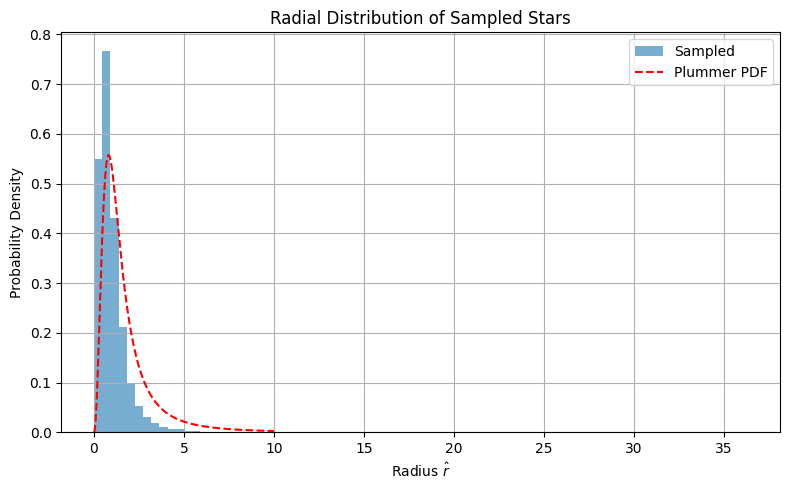

In [5]:
# Visualization of the Sampling process
# Sample positions for N stars
N = 100000
positions = sample_plummer_positions(N)
radii = np.linalg.norm(positions, axis=1)

# Histogram to check radial distribution
plt.figure(figsize=(8, 5))
plt.hist(radii, bins=80, density=True, alpha=0.6, label='Sampled')
r_vals = np.linspace(0, 10, 500)
pr = 3 * r_vals**2 * (1 + r_vals**2)**(-2.5)
plt.plot(r_vals, pr, 'r--', label='Plummer PDF')
plt.xlabel('Radius $\\hat{r}$')
plt.ylabel('Probability Density')
plt.title('Radial Distribution of Sampled Stars')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### d) Verify that the density profile of the sampled stars approaches the desired profile $\hat{\rho}(r)$ for large N.


### 2 versionen IDK ob das so stimmt

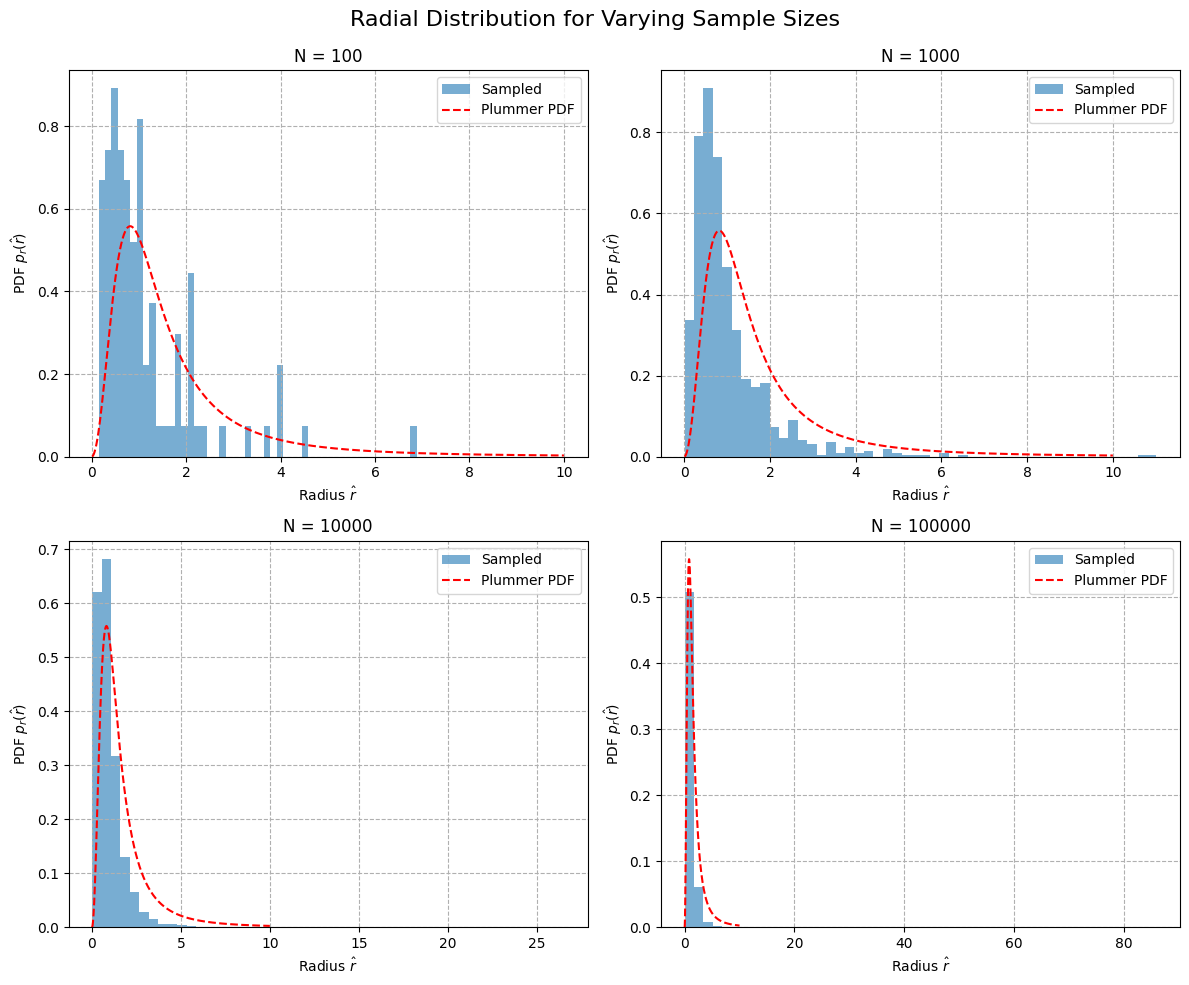

In [6]:
# Different sample sizes
Ns = [100, 1000, 10000, 100000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, N in enumerate(Ns):
    positions = sample_plummer_positions(N)
    radii = np.linalg.norm(positions, axis=1)

    ax = axes[i // 2, i % 2]
    ax.hist(radii, bins=50, density=True, alpha=0.6, label='Sampled')
    
    r_vals = np.logspace(-2, 1, 500)
    pr = 3 * r_vals**2 * (1 + r_vals**2)**(-2.5)
    ax.plot(r_vals, pr, 'r--', label='Plummer PDF')
    ax.set_title(f"N = {N}")
    ax.set_xlabel("Radius $\\hat{r}$")
    ax.set_ylabel("PDF $p_r(\\hat{r})$")
    ax.grid(True, which='both', ls='--')
    ax.legend()

plt.suptitle("Radial Distribution for Varying Sample Sizes", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## Version 2

In [7]:
def compute_radial_density_logbins(positions, num_bins=100):
    """
    Compute radial density using logarithmic bins to better capture wide range of scales.
    """
    r = np.linalg.norm(positions, axis=1)
    r_min = r[r > 0].min()  # avoid log(0)
    r_max = r.max()
    r_bins = np.logspace(np.log10(r_min), np.log10(r_max), num_bins + 1)
    r_centers = np.sqrt(r_bins[1:] * r_bins[:-1])  # geometric mean for center

    counts, _ = np.histogram(r, bins=r_bins)
    shell_volumes = (4/3) * np.pi * (r_bins[1:]**3 - r_bins[:-1]**3)
    density = counts / shell_volumes
    return r_centers, density


In [8]:
r_centers, density_sampled = compute_radial_density_logbins(positions)
density_theory = plummer_density(r_centers)

plt.figure(figsize=(8, 5))
plt.loglog(r_centers, density_sampled, label='Sampled', drawstyle='steps-mid')
plt.loglog(r_centers, density_theory, '--', label='Plummer Density')
plt.xlabel('Radius $\\hat{r}$ (log)')
plt.ylabel('Density $\\hat{\\rho}(\\hat{r})$ (log)')
plt.title('Radial Density Profile (Log-Log)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()


NameError: name 'plummer_density' is not defined

#### e)
We already have positions $X_i$ of stars from the Plummer model, and we now need to sample velocities $v_i$ in a way that keeps the system in dynamical equilibrium.

We do this by:

- Sampling speeds v from a radius-dependent distribution,
- Choosing random 3D directions for the velocity vectors.

This is done in two functions:

In [ ]:
def sample_velocity_q(N):
    """
    Sample N values of q ~ pq(q) using rejection sampling.
    pq(q) = (512 / 7π) * q^2 * (1 - q^2)^(7/2) for q in (0, 1)
    """
    q_vals = []
    c = 1.0  # Upper bound of pq(q) is known to be ~1
    while len(q_vals) < N:
        q = np.random.uniform(0, 1)
        y = np.random.uniform(0, c)
        pq = (512 / (7 * np.pi)) * q**2 * (1 - q**2)**(3.5)
        if y < pq:
            q_vals.append(q)
    return np.array(q_vals)


This function Generates N random numbers with $q_i ∈ (0, 1)$ where each $q=\frac{v}{v_e}$ is a scaled velocity sampled from the known distribution $p_q(q)$

We use the rejection sampling (von Neumann sampling).

It is done by proposing values of  $q ∈ (0, 1)$ uniformly, and accept them with probability proportional to $p_q(q)$

We generate a uniform random number y in [0,c]  where c is an upper bound and accept q, if y < $p_q(q)$.

This is repeated until we have N valid samples.

We use this method because the velocity distribution cannot be inverted analytically, so we can’t use the inversion method like we did for radii.

Therefore, rejection sampling is a simple and effective way to sample from arbitrary shaped PDFs when the maximum value is known.

In [9]:

def sample_plummer_velocities(positions):
    """
    Given star positions (N, 3), sample velocities (N, 3) from the Plummer model.
    """
    N = positions.shape[0]
    radii = np.linalg.norm(positions, axis=1)

    #  Compute escape velocity for each radius
    v_escape = np.sqrt(2) * (1 + radii**2)**(-0.25)

    # Sample q ~ pq(q)
    q_vals = sample_velocity_q(N)

    # Compute actual speed
    speeds = q_vals * v_escape

    # Generate isotropic directions
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    sintheta = np.sqrt(1 - costheta**2)

    vx = speeds * sintheta * np.cos(phi)
    vy = speeds * sintheta * np.sin(phi)
    vz = speeds * costheta

    return np.column_stack((vx, vy, vz))


#### The `sample_plummer_velocities(positions):` function:
- Takes in `positions` (array of (N,3))
- Computes $v_e(r)$ for each star.
- Uses sampled q to scale $v_e(r)$ and get total speed v
- Samples random direction on a sphere (same method as in part c).
- Returns an (N,3) array of velocity vectors.


How it works is:

 1: Compute escape velocity 
 \
$v_e(r) = \sqrt{2}\cdot (1+r^2)^{-1/4}$

- This is the maximum speed a star can have and still be bound at radius r.

 2: Sample scaled speed q∼p  

- We use the sample_velocity_q function to get $q_i$ ∈(0,1) for each star.

3: Convert to physical speed :  \
$v_i = q_i \cdot v_e(r)$

- This gives the actual speed at the star’s position.

4: Generate random directions 
- We use the same method as for position sampling to get uniformly random directions in 3D.
- for this again we use `np.random.uniform`
- Then multiply by the speed to get the full velocity vector $V_i ∈ R^3$


This then ensures that each star gets a realistic, bound velocity drawn from the Plummer model's equilibrium phase space
And the combination of p_q(q) and ve(r) ensures the cluster remains in dynamical equilibrium, i.e., gravity balances kinetic energy.

### f) MCMCapproach



In this exercise, we aim to sample from the full 6D phase space of a globular cluster described by the Plummer model:

$
(\vec{x}, \vec{v}) \in \mathbb{R}^6
$

The phase-space distribution function is given by

$
f(\vec{x}, \vec{v}) \propto f(E) = (-E)^{7/2}, \quad \text{for } E < 0,
$

where the total energy per unit mass is

$
E = \frac{1}{2} \|\vec{v}\|^2 + \Phi(\|\vec{x}\|),
\quad \text{with} \quad \Phi(r) = -\frac{1}{\sqrt{1 + r^2}}.
$

Note that the energy $E$ depends on both position $\vec{x}$ and velocity $\vec{v}$, which means that $f(\vec{x}, \vec{v})$ is not separable.


Because the distribution $f(E)$ couples position and velocity, we cannot sample from $f(\vec{x}, \vec{v})$ using simple analytical or inversion methods. Furthermore:

- There is no known closed-form inverse of the cumulative distribution function.
- The joint distribution over 6D space is complex and highly non-uniform.


Therefore, we use the Metropolis-Hastings MCMC algorithm, which allows us to:

- Sample from arbitrary probability distributions (even unnormalized),
- Work in high-dimensional and non-separable spaces,
- Ensure that the resulting samples are distributed according to the desired distribution $f(E)$.

The Metropolis-Hastings algorithm builds a Markov chain of states $(\vec{x}, \vec{v})$ using the following steps:

- Start with an initial state where $E < 0$ (i.e., the star is bound).
-  Propose a new state $(\vec{x}', \vec{v}')$ by adding small Gaussian noise.
-  Compute the new energy $ E'$. If $E' > 0$, reject the proposal.
-  Otherwise, accept the new state with probability

$
  A = \min\left(1, \left( \frac{-E'}{-E} \right)^{7/2} \right).
$

- After a burn-in phase, store every $k$-th sample to reduce autocorrelation.


In [19]:
def plummer_potential(x):
    r = np.linalg.norm(x)
    return -1 / np.sqrt(1 + r**2)


we first define an energy function `plummer_potential`, which Computes the dimensionless potential 
$\hat{\Phi}(r)$ at a point x.

This is required to compute total energy E = 1/2 $v^2 + \Phi(x)$

In [20]:
def total_energy(x, v):
    return 0.5 * np.dot(v, v) + plummer_potential(x)

Now, we define the total energy at a phase-space point. This is needed to evaluate whether a state is bound (E<0) and to compute the acceptance probability.

In [21]:
def f_E(E):
    return (-E)**(3.5) if E < 0 else 0


Next, we implement the target probability density function 
 $f(E) \propto (−E)^{7/2} $

This is used in the Metropolis acceptance criterion.

### Metropolis-Hastings MCMC
This function generates samples of stars in 6D phase space — that is, both positions  and velocities  — from the Plummer model distribution.

Instead of sampling position and velocity separately (like in part c + e), it samples them together using an MCMC algorithm.

In [22]:
def metropolis_hastings_plummer(N_samples, burn_in=1000, skip=100, sigma=0.3):
    """
    MCMC sampler for the Plummer model.
    Args:
        N_samples: number of desired accepted (x, v) samples
        burn_in: number of steps before collecting samples
        skip: collect every `skip`-th sample after burn-in
        sigma: standard deviation of proposal noise
    Returns:
        xs: array of shape (N_samples, 3) for positions
        vs: array of shape (N_samples, 3) for velocities
    """
    xs = []
    vs = []

    # Initial state: must be bound (E < 0)
    x = np.random.normal(0, 1, 3)
    v = np.random.normal(0, 1, 3)
    while total_energy(x, v) >= 0:
        x = np.random.normal(0, 1, 3)
        v = np.random.normal(0, 1, 3)

    E = total_energy(x, v)
    samples_collected = 0
    steps = 0

    while samples_collected < N_samples:
        # Propose new x', v' with small Gaussian step
        x_new = x + np.random.normal(0, sigma, 3)
        v_new = v + np.random.normal(0, sigma, 3)
        E_new = total_energy(x_new, v_new)

        # Acceptance probability
        if E_new < 0:
            p_accept = min(1, (f_E(E_new) / f_E(E)))
        else:
            p_accept = 0

        if np.random.rand() < p_accept:
            x = x_new
            v = v_new
            E = E_new

        # Collect sample after burn-in and only every `skip` steps
        steps += 1
        if steps > burn_in and steps % skip == 0:
            xs.append(x.copy())
            vs.append(v.copy())
            samples_collected += 1

    return np.array(xs), np.array(vs)


The MCMC sampler `metropolis_hastings_plummer`:

Inputs:

- `N_samples`: number of desired accepted samples.

- `burn_in`: how many initial steps to skip before collecting samples.

- `skip`: how often to keep a sample (e.g. every 100th step).

- `sigma`: step size in the Gaussian proposal distribution — controls exploration range.

- We generate a random starting point where the energy is negative, i.e., the star is gravitationally bound.
- We must start inside the support of the target distribution
- We keep sampling until we collect the desired number of phase-space points: `while samples_collected < N_samples:`
- We generate a proposal by adding small Gaussian noise to current. This defines a symmetric proposal distribution centered on the current state

With the if statements:

- if the proposed energy is positive, we reject immediately (Plummer model has zero probability for unbound stars).

- Otherwise, we compute the relative probability A. This gives the Metropolis acceptance rule.

Then we accept or reject with probability A: `if np.random.rand() < p_accept`
- If accepted, move to new state.

- If not, stay at current state.

We only start collecting after burn_in steps. (Burn-in is the initial period of the MCMC simulation where we discard samples because they may not yet be representative of the target distribution.)

- Only collect every skip steps to reduce autocorrelation (which is typical in MCMC).

- Save a copy of the current state to avoid it changing later.

At last, we return two arrays of shape (N_samples, 3) containing:

`xs`: positions sampled from the Plummer phase-space distribution

`vs`: velocities consistent with equilibrium dynamics



In [23]:
N = 10000
xs, vs = metropolis_hastings_plummer(N)

The Metropolis-Hastings MCMC method is the most suitable approach for sampling from the Plummer model's full phase-space distribution because it:

- Handles the complexity of coupled $\vec{x}$ and $\vec{v}$,
- Requires only relative probabilities (no normalization),
- Provides accurate samples from the equilibrium distribution.



In [29]:
# Theoretical radial PDF
def plummer_radial_pdf(r):
    return 3 * r**2 * (1 + r**2)**(-2.5)

# Compare radial density profiles
def compare_radial_density_profiles(N=10000):
    # --- Two-step method ---
    positions_two_step = sample_plummer_positions(N)

    # --- MCMC method ---
    positions_mcmc, _ = metropolis_hastings_plummer(N)

    # --- Compute radii ---
    r_two_step = np.linalg.norm(positions_two_step, axis=1)
    r_mcmc = np.linalg.norm(positions_mcmc, axis=1)

    # --- Plot setup ---
    bins = np.logspace(-2, 1.2, 60)
    r_vals = np.logspace(-2, 1.2, 500)
    pdf_theory = plummer_radial_pdf(r_vals)

    plt.figure(figsize=(9, 6))
    plt.hist(r_two_step, bins=bins, density=True, alpha=0.5, label='Two-step method')
    plt.hist(r_mcmc, bins=bins, density=True, alpha=0.5, label='MCMC method')
    plt.plot(r_vals, pdf_theory, 'k--', label='Theoretical $p_r(\\hat{r})$')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radius $\\hat{r}$')
    plt.ylabel('Probability Density')
    plt.title('Radial Density Profile: Two-Step vs. MCMC')
    plt.grid(True, which='both', ls='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

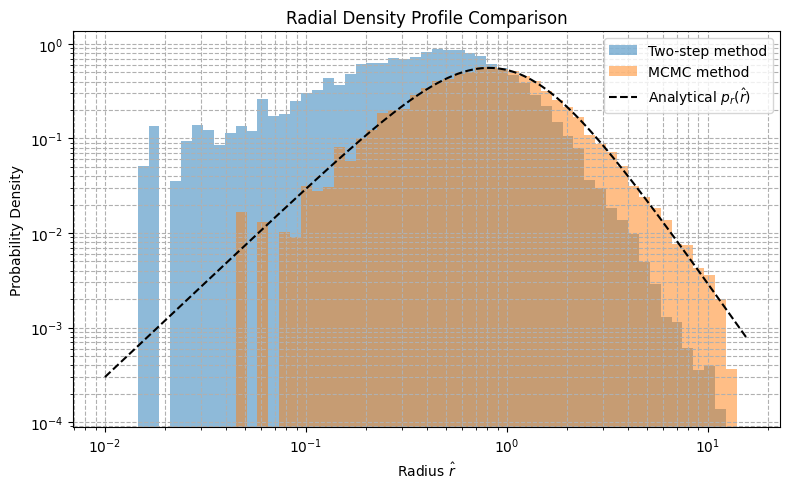

In [28]:
# call the function
compare_density_profiles(N_samples=10000)


# Pltot noch beschreiben